In [1]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#import libraries
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

**Data Collection**

In [16]:
!ls
!python gdrive/'My Drive'/make_dataset.py -q 'Basset Hound' -o gdrive/'My Drive'/Dataset/BassetHound

data  gdrive  models
[INFO] searching Bing API for 'Basset Hound'
[INFO] 200 total results for 'Basset Hound'
[INFO] making request for group 0-50 of 200...
[INFO] saving images for group 0-50 of 200...
[INFO] fetching: https://i.ytimg.com/vi/dOi5OowwY38/maxresdefault.jpg
[INFO] fetching: http://2.bp.blogspot.com/-y5Ijn60d9i0/UUaLCNg0wSI/AAAAAAAAAVI/bkST2QZeYxQ/s1600/7417-basset-hound2-22.jpg
[INFO] fetching: http://3.bp.blogspot.com/-iLCuXipUfos/UUaKoQElHgI/AAAAAAAAAUw/n7p2Cb03irc/s1600/1198067200basset_hound1.jpg
[INFO] fetching: https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Duo_de_basset-hound.jpg/220px-Duo_de_basset-hound.jpg
[INFO] fetching: http://4.bp.blogspot.com/-Q6uw4wdBkOY/TmXiqJbEqpI/AAAAAAAAA2o/13BEafUBrG0/s1600/basset1.jpg
[INFO] fetching: https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/13001119/Basset-Hound-Care.jpg
[INFO] deleting: gdrive/My Drive/Dataset/BassetHound/00000005.jpg
[INFO] fetching: https://www.pawsplaygrounds.com/wp-

In [17]:
!python gdrive/'My Drive'/make_dataset.py -q 'Blood Hound' -o gdrive/'My Drive'/Dataset/BloodHound

[INFO] searching Bing API for 'Blood Hound'
[INFO] 200 total results for 'Blood Hound'
[INFO] making request for group 0-50 of 200...
[INFO] saving images for group 0-50 of 200...
[INFO] fetching: https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Bloodhound_2.jpg/220px-Bloodhound_2.jpg
[INFO] fetching: https://upload.wikimedia.org/wikipedia/en/thumb/9/9a/Bloodhound_red_black_pigmented.jpg/1200px-Bloodhound_red_black_pigmented.jpg
[INFO] fetching: http://s3.amazonaws.com/assets.prod.vetstreet.com/7d/420100a7e211e0a0d50050568d634f/file/bloodhound-1-645mk070411.jpg
[INFO] fetching: http://4.bp.blogspot.com/-or7C3qwXHHU/TlIvKWm071I/AAAAAAAAAWY/d_y53OygFOY/s1600/RPY_Dog_Facelift_YOEP03.jpg
[INFO] fetching: https://cdn2-www.dogtime.com/assets/uploads/gallery/bloodhound-dog-breed-pictures/7-faceforward.jpg
[INFO] fetching: http://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Bloodhound_Puppy.jpg/476px-Bloodhound_Puppy.jpg
[INFO] fetching: https://images.mentalfloss.com/sites/defau

**Data Processing**

In [19]:
classes = ['BassetHound','BloodHound']
path = Path(root_dir+'Dataset')

for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

BassetHound


BloodHound


In [0]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.3, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [33]:
data.classes

['BassetHound', 'BloodHound']

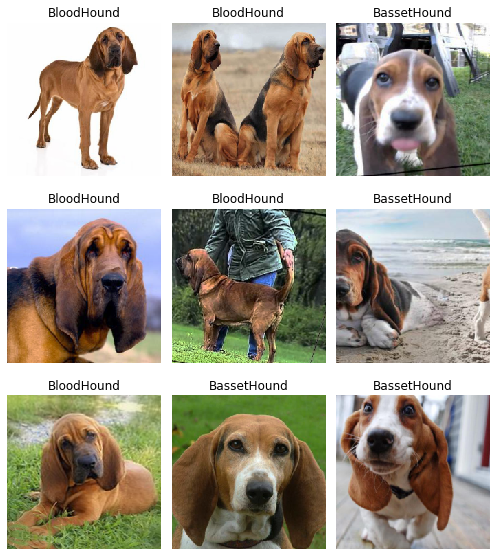

In [34]:
data.show_batch(rows=3, figsize=(7,8))

In [35]:
print('Training Data size : ',len(data.train_ds))
print('Validate Data size : ',len(data.valid_ds))

Training Data size :  259
Validate Data size :  111


**Training Model**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [37]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.695255,0.031920,0.009009,00:05
1,0.363126,0.007373,0.000000,00:05
2,0.245995,0.009112,0.009009,00:05
3,0.184401,0.013482,0.009009,00:05


**Results**

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

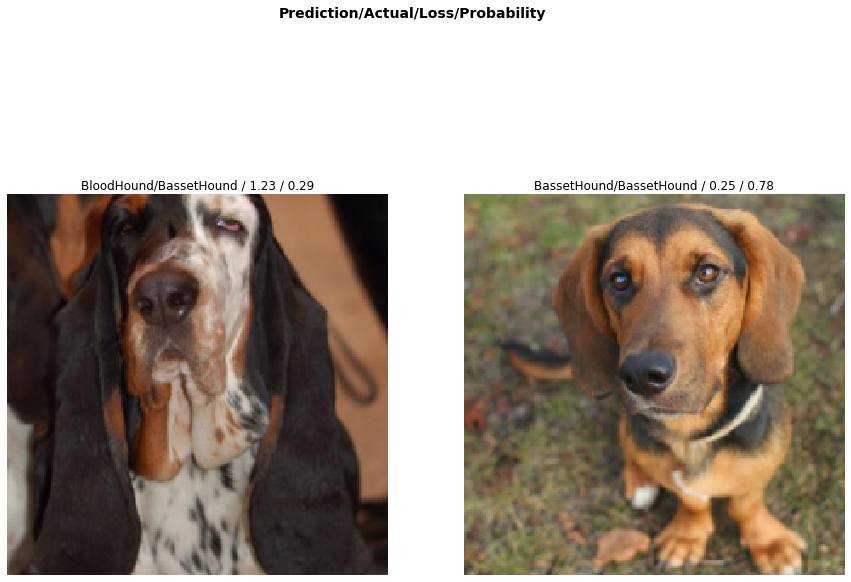

In [42]:
interp.plot_top_losses(2, figsize=(15,11))

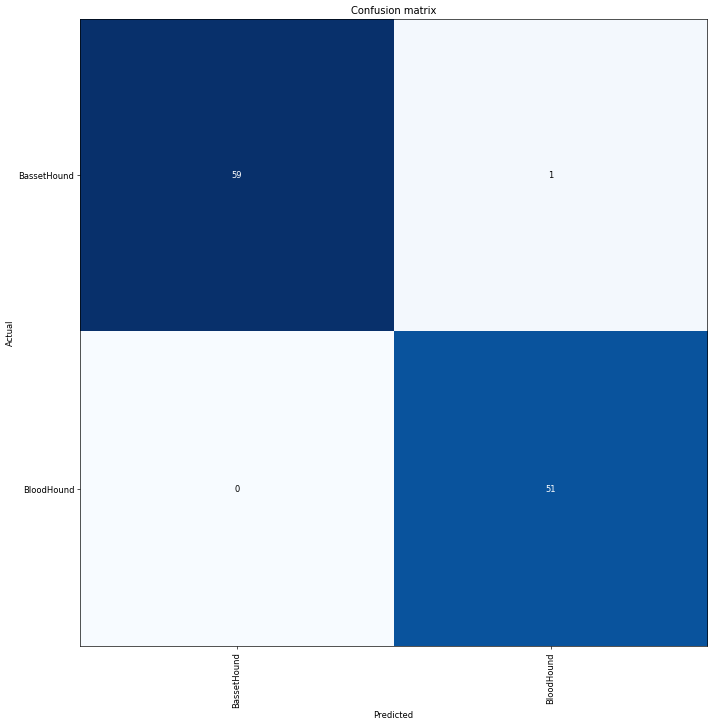

In [43]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

There is only **1** inaccurate predcition. Pretty impressive !!